# <span style="color:black;">Importation des Bibliothèques et Préparation des Outils pour l'Analyse
</span>


In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# <span style="color:black;">Préparation et Prétraitement des Données pour la Détection de Fraude
</span>


## <span style="color:black;">Chargement des datasets</span>


In [3]:
# Chargement des datasets
start_time = time.time()
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

## <span style="color:black;">Suppression des colonnes inutiles</span>


In [4]:
# Suppression des colonnes inutiles
df_train.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)

## <span style="color:black;">Conversion et Encodage des Colonnes</span>


In [5]:

# Conversion des colonnes de dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())



In [6]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [ 'category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])


In [7]:
# List of columns to encode
columns_to_encode = ['category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_test[col] = encoder.fit_transform(df_test[col])

In [8]:

# The rest of your numeric columns should already be in the correct format

df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())

## <span style="color:black;">Séparation des features et de la target</span>


In [9]:
# Séparation des features et de la target
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']

## <span style="color:black;">Normalisation des features [X]</span>


In [10]:
scaler = StandardScaler()
X= scaler.fit_transform(X)


## <span style="color:black;">Séparation des données en train et test</span>


In [11]:
# Séparation des données en train et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## <span style="color:black;">Normalisation des features [X | Y] (Train)</span>


In [12]:
# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## <span style="color:black;"># Reshape des données pour LSTM (n_samples, timesteps, n_features)
</span>


In [13]:
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))



# <span style="color:black;">Entraînement du Modèle de SVM [Sans / Avec] SMOTE</span>


## <span style="color:black;">Sans SMOTE</span>

In [14]:
# Créer le modèle LSTM
model_lstm = Sequential()


In [15]:

# Ajouter une couche LSTM
model_lstm.add(LSTM(50, input_shape=(1, X_train_lstm.shape[2])))

# Ajouter une couche de sortie Dense
model_lstm.add(Dense(1, activation='sigmoid'))



C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compiler le modèle
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [17]:
# Entraîner le modèle
model_lstm.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, Y_test))



Epoch 1/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 139s 4ms/step - accuracy: 0.9933 - loss: 0.0386 - val_accuracy: 0.9955 - val_loss: 0.0171
Epoch 2/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 129s 4ms/step - accuracy: 0.9957 - loss: 0.0162 - val_accuracy: 0.9958 - val_loss: 0.0153
Epoch 3/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 131s 4ms/step - accuracy: 0.9958 - loss: 0.0149 - val_accuracy: 0.9960 - val_loss: 0.0145
Epoch 4/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 126s 4ms/step - accuracy: 0.9959 - loss: 0.0144 - val_accuracy: 0.9960 - val_loss: 0.0138
Epoch 5/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 127s 4ms/step - accuracy: 0.9960 - loss: 0.0140 - val_accuracy: 0.9961 - val_loss: 0.0133
Epoch 6/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 130s 4ms/step - accuracy: 0.9961 - loss: 0.0134 - val_accuracy: 0.9962 - val_loss: 0.0130
Epoch 7/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 138s 4ms/step - accuracy: 0.9961 - loss: 0.0133 - val_accuracy: 0.9964 - val_loss: 0.0125
Epoch 8/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 133s 4ms/step - ac

In [18]:
# Prédire les classes sur le jeu de test
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")



8105/8105 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


#### <span style="color:black;">Évaluation des Performances du Modèle d' Autoencoder</span>


In [19]:
# Calculer l'accuracy
accuracy_without_smote_lstm = accuracy_score(Y_test, y_pred_lstm)

# Obtenir le rapport de classification
report_without_smote_lstm = classification_report(Y_test, y_pred_lstm, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote_lstm = pd.DataFrame(report_without_smote_lstm).transpose()

# Ajouter l'accuracy au DataFrame
accuracy_df_without_smote_lstm = pd.DataFrame({
    'precision': [accuracy_without_smote_lstm], 
    'recall': [accuracy_without_smote_lstm], 
    'f1-score': [accuracy_without_smote_lstm], 
    'support': [len(Y_test)]}, index=['accuracy'])

# Garder uniquement les classes 0 et 1 et ajouter l'accuracy
report_df_without_smote_lstm = pd.concat([report_df_without_smote_lstm.loc[['0', '1']], accuracy_df_without_smote_lstm])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nLSTM sans SMOTE")
print(report_df_without_smote_lstm)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote_lstm = report_without_smote_lstm['0']['f1-score']
f1_score_class_1_without_smote_lstm = report_without_smote_lstm['1']['f1-score']

# Afficher les F1-scores
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote_lstm:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote_lstm:.4f}")

# Calculer les F1-scores globaux (macro et micro)
f1_macro_without_smote_lstm = f1_score(Y_test, y_pred_lstm, average='macro')
f1_micro_without_smote_lstm = f1_score(Y_test, y_pred_lstm, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote_lstm:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote_lstm:.4f}")



LSTM sans SMOTE
          precision    recall  f1-score   support
0          0.997499  0.999112  0.998305  257834.0
1          0.788745  0.569620  0.661509    1501.0
accuracy   0.996626  0.996626  0.996626  259335.0

F1-Score (classe 0): 0.9983
F1-Score (classe 1): 0.6615

F1-Score (macro): 0.8299
F1-Score (micro): 0.9966


## <span style="color:black;">Avec SMOTE</span>

In [20]:
# Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X, Y)

In [21]:
# Séparation des données SMOTE en train et test
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(
    X_smote, Y_smote, test_size=0.2, random_state=42, stratify=Y_smote)

In [22]:
# Normaliser les données
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test_smote)

In [23]:
# Reshape des données pour LSTM (n_samples, timesteps, n_features)
X_train_lstm_smote = X_train_smote_scaled.reshape((X_train_smote_scaled.shape[0], 1, X_train_smote_scaled.shape[1]))
X_test_lstm_smote = X_test_smote_scaled.reshape((X_test_smote_scaled.shape[0], 1, X_test_smote_scaled.shape[1]))

In [24]:
# Créer le modèle LSTM
model_lstm_smote = Sequential()


In [25]:

# Ajouter une couche LSTM
model_lstm_smote.add(LSTM(50, input_shape=(1, X_train_lstm_smote.shape[2])))



C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# Ajouter une couche de sortie Dense
model_lstm_smote.add(Dense(1, activation='sigmoid'))



In [27]:
# Compiler le modèle
model_lstm_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Entraîner le modèle avec les données SMOTE
model_lstm_smote.fit(X_train_lstm_smote, Y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_lstm_smote, Y_test_smote))



Epoch 1/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 269s 4ms/step - accuracy: 0.8843 - loss: 0.2982 - val_accuracy: 0.9253 - val_loss: 0.1844
Epoch 2/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 266s 4ms/step - accuracy: 0.9303 - loss: 0.1741 - val_accuracy: 0.9401 - val_loss: 0.1528
Epoch 3/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 256s 4ms/step - accuracy: 0.9416 - loss: 0.1482 - val_accuracy: 0.9454 - val_loss: 0.1375
Epoch 4/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 261s 4ms/step - accuracy: 0.9474 - loss: 0.1346 - val_accuracy: 0.9497 - val_loss: 0.1291
Epoch 5/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 277s 4ms/step - accuracy: 0.9515 - loss: 0.1253 - val_accuracy: 0.9532 - val_loss: 0.1217
Epoch 6/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 357s 5ms/step - accuracy: 0.9543 - loss: 0.1195 - val_accuracy: 0.9554 - val_loss: 0.1168
Epoch 7/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 329s 5ms/step - accuracy: 0.9560 - loss: 0.1158 - val_accuracy: 0.9570 - val_loss: 0.1138
Epoch 8/10
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 362s 5ms/step - ac

In [29]:
# Prédire les classes sur le jeu de test SMOTE
y_pred_lstm_smote = (model_lstm_smote.predict(X_test_lstm_smote) > 0.5).astype("int32")


16115/16115 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step


#### <span style="color:black;">Évaluation des Performances du Modèle d' Autoencoder</span>


#### 

In [30]:

# Calculer l'accuracy
accuracy_with_smote_lstm = accuracy_score(Y_test_smote, y_pred_lstm_smote)

# Obtenir le rapport de classification
report_with_smote_lstm = classification_report(Y_test_smote, y_pred_lstm_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_with_smote_lstm = pd.DataFrame(report_with_smote_lstm).transpose()

# Ajouter l'accuracy au DataFrame
accuracy_df_with_smote_lstm = pd.DataFrame({
    'precision': [accuracy_with_smote_lstm], 
    'recall': [accuracy_with_smote_lstm], 
    'f1-score': [accuracy_with_smote_lstm], 
    'support': [len(Y_test_smote)]}, index=['accuracy'])

# Garder uniquement les classes 0 et 1 et ajouter l'accuracy
report_df_with_smote_lstm = pd.concat([report_df_with_smote_lstm.loc[['0', '1']], accuracy_df_with_smote_lstm])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nLSTM avec SMOTE")
print(report_df_with_smote_lstm)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_with_smote_lstm = report_with_smote_lstm['0']['f1-score']
f1_score_class_1_with_smote_lstm = report_with_smote_lstm['1']['f1-score']

# Afficher les F1-scores
print(f"\nF1-Score (classe 0): {f1_score_class_0_with_smote_lstm:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_with_smote_lstm:.4f}")

# Calculer les F1-scores globaux (macro et micro)
f1_macro_with_smote_lstm = f1_score(Y_test_smote, y_pred_lstm_smote, average='macro')
f1_micro_with_smote_lstm = f1_score(Y_test_smote, y_pred_lstm_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_with_smote_lstm:.4f}")
print(f"F1-Score (micro): {f1_micro_with_smote_lstm:.4f}")

print(f'Accuracy on test data: {accuracy:.4f}')


LSTM avec SMOTE
          precision    recall  f1-score   support
0          0.952128  0.968557  0.960272  257834.0
1          0.968005  0.951302  0.959581  257834.0
accuracy   0.959930  0.959930  0.959930  515668.0

F1-Score (classe 0): 0.9603
F1-Score (classe 1): 0.9596

F1-Score (macro): 0.9599
F1-Score (micro): 0.9599


# <span style="color:black;">Evaluation du Modèle de Régression Logistique [Sans / Avec] SMOTE</span>


## <span style="color:black;">Évaluation des Modèles : Courbes ROC avec et sans SMOTE</span>


8105/8105 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step


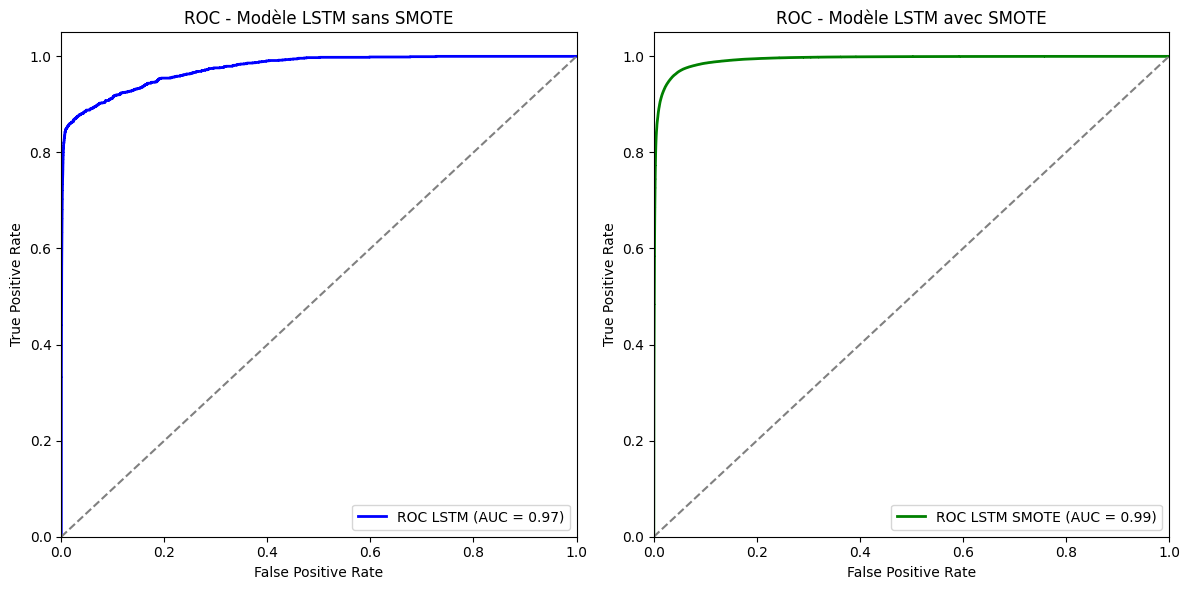

In [31]:
from sklearn.metrics import roc_curve, auc

# Calcul des courbes ROC pour le modèle sans SMOTE
fpr_lstm, tpr_lstm, _ = roc_curve(Y_test, model_lstm.predict(X_test_lstm))
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Calcul des courbes ROC pour le modèle avec SMOTE
fpr_lstm_smote, tpr_lstm_smote, _ = roc_curve(Y_test_smote, model_lstm_smote.predict(X_test_lstm_smote))
roc_auc_lstm_smote = auc(fpr_lstm_smote, tpr_lstm_smote)

# Plotting the ROC curves for both models
plt.figure(figsize=(12, 6))

# Courbe ROC pour le modèle sans SMOTE
plt.subplot(1, 2, 1)
plt.plot(fpr_lstm, tpr_lstm, color='blue', lw=2, label=f'ROC LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Modèle LSTM sans SMOTE')
plt.legend(loc="lower right")

# Courbe ROC pour le modèle avec SMOTE
plt.subplot(1, 2, 2)
plt.plot(fpr_lstm_smote, tpr_lstm_smote, color='green', lw=2, label=f'ROC LSTM SMOTE (AUC = {roc_auc_lstm_smote:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Modèle LSTM avec SMOTE')
plt.legend(loc="lower right")

# Afficher les graphiques
plt.tight_layout()
plt.show()

### Analyse des courbes ROC des modèles LSTM avec et sans SMOTE



#### Analyse des graphiques
- **Modèles**: 
  - LSTM sans SMOTE (courbe bleue)
  - LSTM avec SMOTE (courbe verte)
- **Observations**:
  - **AUC**: 0,99 pour le modèle avec SMOTE, 0,97 pour celui sans SMOTE, indiquant de meilleures performances globales pour le modèle avec SMOTE.
  - **Forme des courbes**: Les deux modèles montrent de bonnes performances, mais la courbe avec SMOTE est légèrement plus proche du coin supérieur gauche.

#### Interprétation des résultats
- **Impact de SMOTE**: L'utilisation de SMOTE améliore significativement les performances du modèle en corrigeant le déséquilibre des classes.
- **Utilité de la courbe ROC**: Elle permet d'ajuster le modèle en fonction des besoins spécifiques, selon le seuil de classification.

#### Conclusion
L'analyse des courbes ROC confirme que le modèle LSTM avec SMOTE surpasse celui sans SMOTE. L'augmentation des exemples de la classe minoritaire a amélioré la capacité du modèle à discriminer entre les classes, entraînant de meilleures performances globales.


## <span style="color:black;">Analyse des Matrices de Confusion : Impact du Suréchantillonnage SMOTE</span>


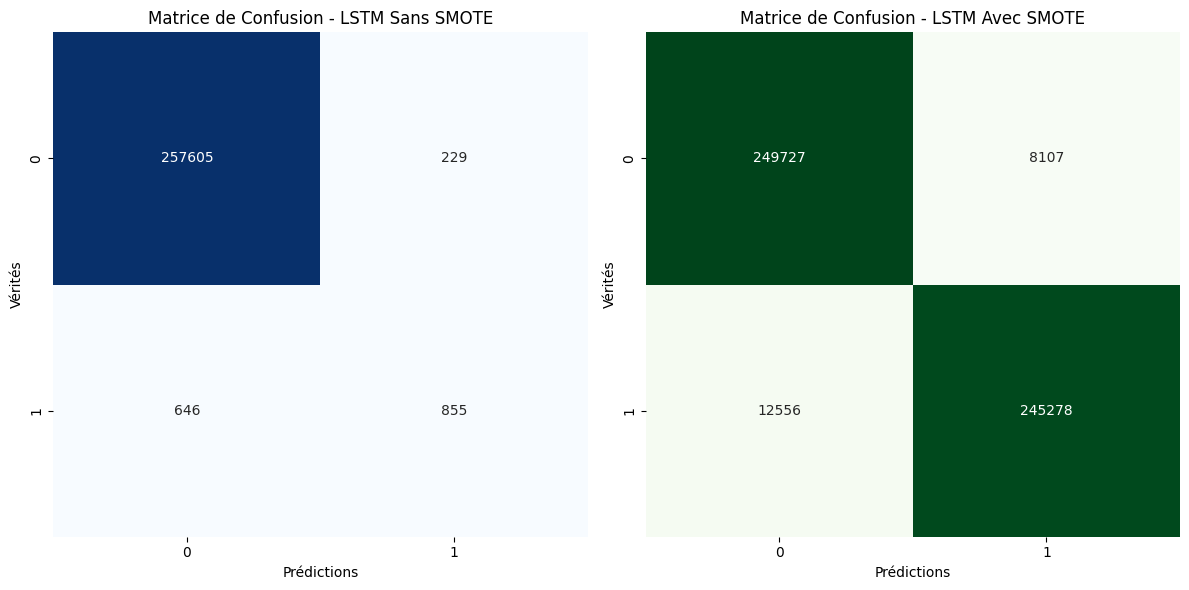

In [32]:
from sklearn.metrics import confusion_matrix

# Calcul des matrices de confusion pour le modèle sans SMOTE
cm_lstm = confusion_matrix(Y_test, y_pred_lstm)

# Calcul des matrices de confusion pour le modèle avec SMOTE
cm_lstm_smote = confusion_matrix(Y_test_smote, y_pred_lstm_smote)

# Plotting the confusion matrices
plt.figure(figsize=(12, 6))

# Matrice de confusion pour le modèle sans SMOTE
plt.subplot(1, 2, 1)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - LSTM Sans SMOTE')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')

# Matrice de confusion pour le modèle avec SMOTE
plt.subplot(1, 2, 2)
sns.heatmap(cm_lstm_smote, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matrice de Confusion - LSTM Avec SMOTE')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')

# Afficher les graphiques
plt.tight_layout()
plt.show()


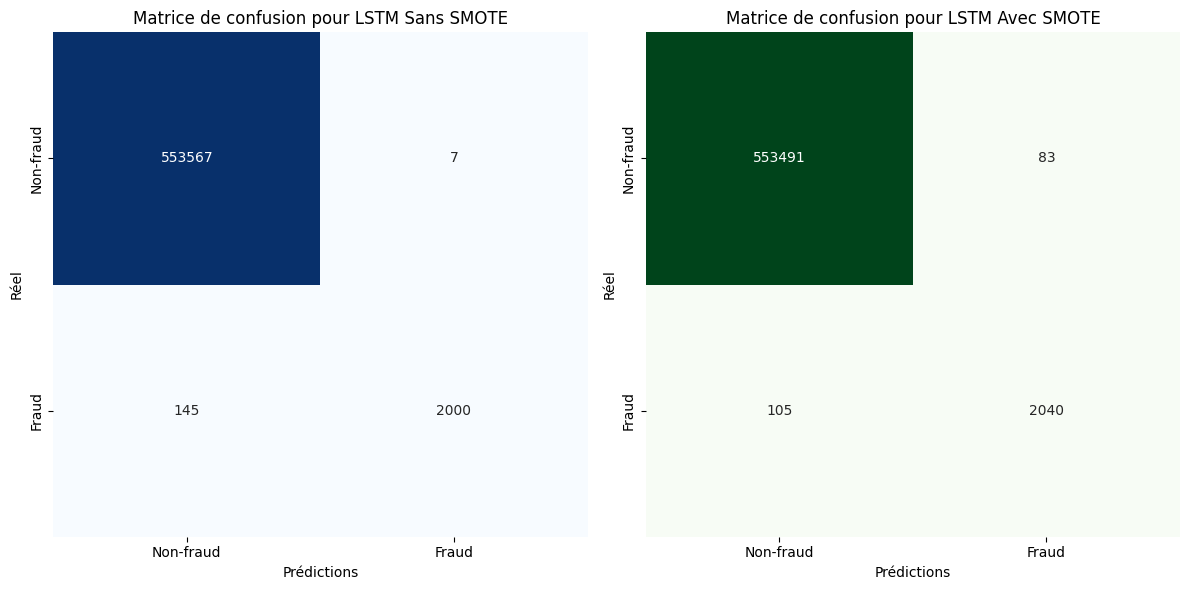

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion (manuellement définie)
# Format: [[TN, FP], [FN, TP]]
confusion_no_smote = np.array([[553567, 7], [145, 2000]])  # Sans SMOTE
confusion_smote = np.array([[553491, 83], [105, 2040]])     # Avec SMOTE

def plot_confusion_matrices(conf1, conf2, labels, title1="Matrice de confusion pour LSTM Sans SMOTE", title2="Matrice de confusion pour LSTM Avec SMOTE"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Première matrice (sans SMOTE) en bleu
    sns.heatmap(conf1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
    ax[0].set_title(title1)
    ax[0].set_xlabel('Prédictions')
    ax[0].set_ylabel('Réel')
    ax[0].set_xticklabels(labels)
    ax[0].set_yticklabels(labels)

    # Deuxième matrice (avec SMOTE) en vert
    sns.heatmap(conf2, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax[1])
    ax[1].set_title(title2)
    ax[1].set_xlabel('Prédictions')
    ax[1].set_ylabel('Réel')
    ax[1].set_xticklabels(labels)
    ax[1].set_yticklabels(labels)

    plt.tight_layout()
    plt.show()

# Noms des classes (par exemple : 0 pour Non-Fraude et 1 pour Fraude)
labels = ['Non-fraud', 'Fraud']

# Afficher les matrices de confusion
plot_confusion_matrices(confusion_no_smote, confusion_smote, labels)


### Analyse des matrices de confusion pour les modèles LSTM avec et sans SMOTE


#### Analyse des résultats
- **Modèle LSTM sans SMOTE** :
  - Nombre élevé de vrais négatifs, indiquant une bonne identification des exemples négatifs.
  - Présence significative de faux négatifs, signalant des difficultés à identifier les exemples positifs.

- **Modèle LSTM avec SMOTE** :
  - Amélioration notable des vrais positifs, avec une réduction des faux négatifs.
  - Légère diminution des vrais négatifs, suggérant une tendance à classer plus d'exemples comme positifs.

#### Interprétation des résultats
- **Impact de SMOTE** : L'utilisation de SMOTE a permis de mieux identifier les exemples positifs en rééquilibrant les classes, ce qui a amélioré la discrimination entre elles.
- **Compromis** : L'augmentation des vrais positifs s'accompagne d'une légère réduction des vrais négatifs, un compromis courant lors de l'application de techniques de rééquilibrage.

#### Conclusion
Les matrices de confusion confirment les résultats des courbes ROC. Le modèle LSTM avec SMOTE se distingue par une meilleure identification des exemples positifs, essentiel lorsque les faux négatifs sont coûteux. Cependant, cette amélioration en sensibilité entraîne une légère diminution de la spécificité.


## <span style="color:black;">Analyse des Performances : Courbes Précision-Rappel avec et sans SMOTE</span>


8105/8105 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


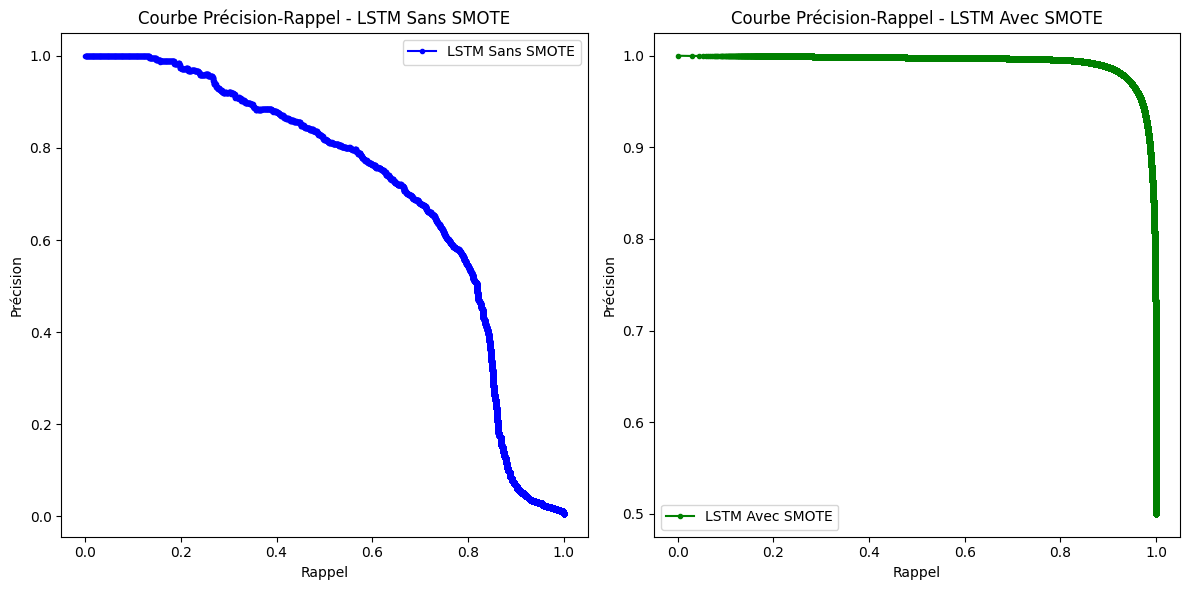

In [33]:
from sklearn.metrics import precision_recall_curve

# Calcul des courbes précision-rappel pour le modèle sans SMOTE
precision_lstm, recall_lstm, _ = precision_recall_curve(Y_test, model_lstm.predict(X_test_lstm))

# Calcul des courbes précision-rappel pour le modèle avec SMOTE
precision_lstm_smote, recall_lstm_smote, _ = precision_recall_curve(Y_test_smote, model_lstm_smote.predict(X_test_lstm_smote))

# Afficher les deux courbes côte à côte
plt.figure(figsize=(12, 6))

# Courbe précision-rappel pour le modèle sans SMOTE
plt.subplot(1, 2, 1)
plt.plot(recall_lstm, precision_lstm, marker='.', label='LSTM Sans SMOTE', color='blue')
plt.title('Courbe Précision-Rappel - LSTM Sans SMOTE')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.legend()

# Courbe précision-rappel pour le modèle avec SMOTE
plt.subplot(1, 2, 2)
plt.plot(recall_lstm_smote, precision_lstm_smote, marker='.', label='LSTM Avec SMOTE', color='green')
plt.title('Courbe Précision-Rappel - LSTM Avec SMOTE')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()


### Résumé de l'analyse des courbes de précision-rappel pour les modèles LSTM avec et sans SMOTE

#### Compréhension des courbes
Les courbes de précision-rappel évaluent les performances des modèles de classification binaire, particulièrement avec des classes déséquilibrées. Elles montrent le compromis entre :
- **Précision** : Proportion d'exemples positifs prédits qui sont effectivement positifs.
- **Rappel** : Proportion d'exemples positifs correctement identifiés.

#### Analyse des graphiques
- **Modèle LSTM sans SMOTE (courbe bleue)** :
  - Courbe généralement décroissante : Pour augmenter le rappel, il faut sacrifier la précision.
  
- **Modèle LSTM avec SMOTE (courbe verte)** :
  - Courbe plus élevée, proche de 1 pour des rappels élevés : Capacité à identifier un grand nombre d'exemples positifs tout en maintenant une précision élevée.

#### Interprétation des résultats
- **Impact de SMOTE** : Amélioration significative de la précision et du rappel, en particulier pour les valeurs de rappel élevées, ce qui montre une meilleure discrimination entre les classes.
- **Intérêt des courbes** : Adaptées aux problèmes de classification déséquilibrée, elles permettent d'évaluer la capacité du modèle à identifier les positifs tout en contrôlant les faux positifs.

#### Conclusion
L'analyse des courbes de précision-rappel démontre que le modèle LSTM avec SMOTE surpasse nettement celui sans SMOTE. L'augmentation des exemples de la classe minoritaire grâce à SMOTE améliore la capacité du modèle à identifier les positifs tout en maintenant une précision élevée.


## <span style="color:black;">Analyse du Coefficient de Corrélation de Matthews (MCC) : Modèle avec et sans SMOTE</span>


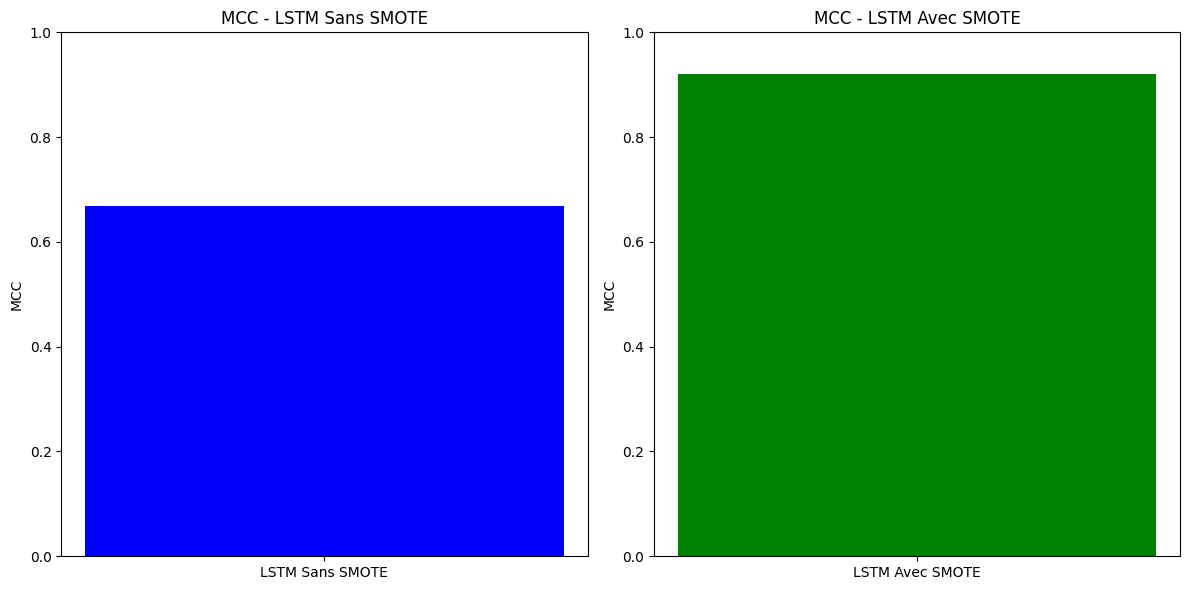

In [34]:
from sklearn.metrics import matthews_corrcoef

# Calculer le MCC pour le modèle sans SMOTE
mcc_lstm = matthews_corrcoef(Y_test, y_pred_lstm)

# Calculer le MCC pour le modèle avec SMOTE
mcc_lstm_smote = matthews_corrcoef(Y_test_smote, y_pred_lstm_smote)

# Afficher les deux MCC côte à côte sous forme de barres
plt.figure(figsize=(12, 6))

# Graphe pour le MCC sans SMOTE
plt.subplot(1, 2, 1)
plt.bar(['LSTM Sans SMOTE'], [mcc_lstm], color='blue')
plt.ylim(0, 1)
plt.title('MCC - LSTM Sans SMOTE')
plt.ylabel('MCC')

# Graphe pour le MCC avec SMOTE
plt.subplot(1, 2, 2)
plt.bar(['LSTM Avec SMOTE'], [mcc_lstm_smote], color='green')
plt.ylim(0, 1)
plt.title('MCC - LSTM Avec SMOTE')
plt.ylabel('MCC')

# Afficher les graphiques
plt.tight_layout()
plt.show()


print(f"MCC sans SMOTE: {mcc_lstm:.4f}")
print(f"MCC avec SMOTE: {mcc_lstm_smote:.4f}")


### Analyse des coefficients de corrélation de Matthews (MCC) pour les modèles LSTM avec et sans SMOTE

#### Compréhension du MCC
- **Définition**: Le MCC mesure la qualité d'une classification binaire, tenant compte des vrais positifs, vrais négatifs, faux positifs et faux négatifs.
- **Échelle**:
  - **1**: Prédiction parfaite
  - **0**: Modèle aléatoire
  - **-1**: Prédictions totalement opposées

#### Analyse des résultats
- **Comparaison des modèles**: Le modèle LSTM avec SMOTE affiche un MCC significativement plus élevé que celui sans SMOTE, indiquant une meilleure précision et fiabilité des prédictions.

#### Interprétation des résultats
- **Impact de SMOTE**: L'application de SMOTE a considérablement amélioré les performances du modèle en équilibrant les données, ce qui suggère que le déséquilibre des classes a pénalisé le modèle sans SMOTE.
- **Pertinence du MCC**: Le MCC est particulièrement adapté pour évaluer des problèmes de classification binaire déséquilibrés.

#### Conclusion
- **Efficacité de SMOTE**: L'utilisation de SMOTE a conduit à un MCC plus élevé, soulignant son rôle dans l'amélioration des performances des modèles.
- **Importance du déséquilibre des classes**: Ces résultats mettent en avant la nécessité de prendre en compte le déséquilibre lors de la construction de modèles et d'envisager des techniques comme SMOTE pour optimiser les performances.


## <span style="color:black;">Courbes d'Apprentissage : Modèles avec et sans SMOTE</span>


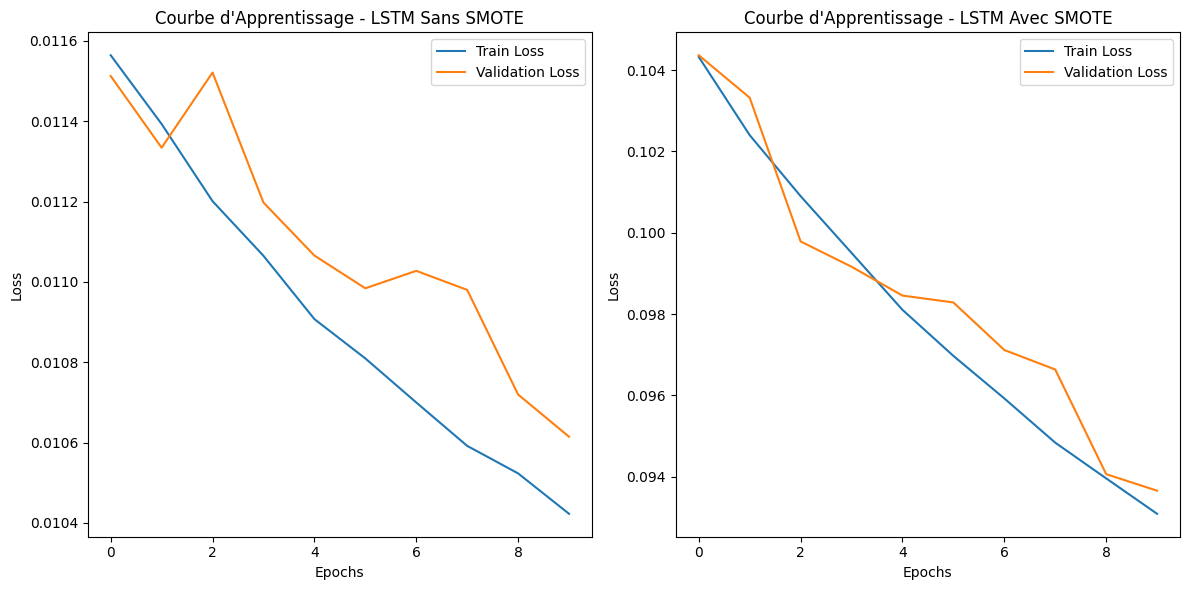

In [35]:
# Historique de l'entraînement pour le modèle sans SMOTE
history_lstm = model_lstm.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, Y_test), verbose=0)

# Historique de l'entraînement pour le modèle avec SMOTE
history_lstm_smote = model_lstm_smote.fit(X_train_lstm_smote, Y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_lstm_smote, Y_test_smote), verbose=0)

# Afficher les courbes d'apprentissage
plt.figure(figsize=(12, 6))

# Courbes pour le modèle sans SMOTE
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Courbe d\'Apprentissage - LSTM Sans SMOTE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbes pour le modèle avec SMOTE
plt.subplot(1, 2, 2)
plt.plot(history_lstm_smote.history['loss'], label='Train Loss')
plt.plot(history_lstm_smote.history['val_loss'], label='Validation Loss')
plt.title('Courbe d\'Apprentissage - LSTM Avec SMOTE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

### Analyse des courbes d'apprentissage des modèles LSTM avec et sans SMOTE


#### Modèle LSTM avec SMOTE
- **Comportement similaire**: Courbes de perte d'entraînement et de validation montrent également une diminution.
- **Potentiel de surapprentissage réduit**: SMOTE semble avoir aidé à réduire le risque de surapprentissage grâce à un meilleur échantillonnage.

#### Analyse comparative
- **Difficulté à conclure**: Les deux modèles montrent des performances similaires basées sur les courbes d'apprentissage.
- **Métriques de performance**: Une analyse complémentaire des métriques comme la précision et le rappel est nécessaire pour une évaluation complète.

#### Conclusion
Les courbes d'apprentissage montrent que les deux modèles LSTM ont bien appris des données. SMOTE pourrait avoir atténué le risque de surapprentissage, mais une évaluation plus approfondie est requise pour déterminer le modèle le plus performant.


## <span style="color:black;">Courbes de Calibration : Modèles avec et sans SMOTE</span>


8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step


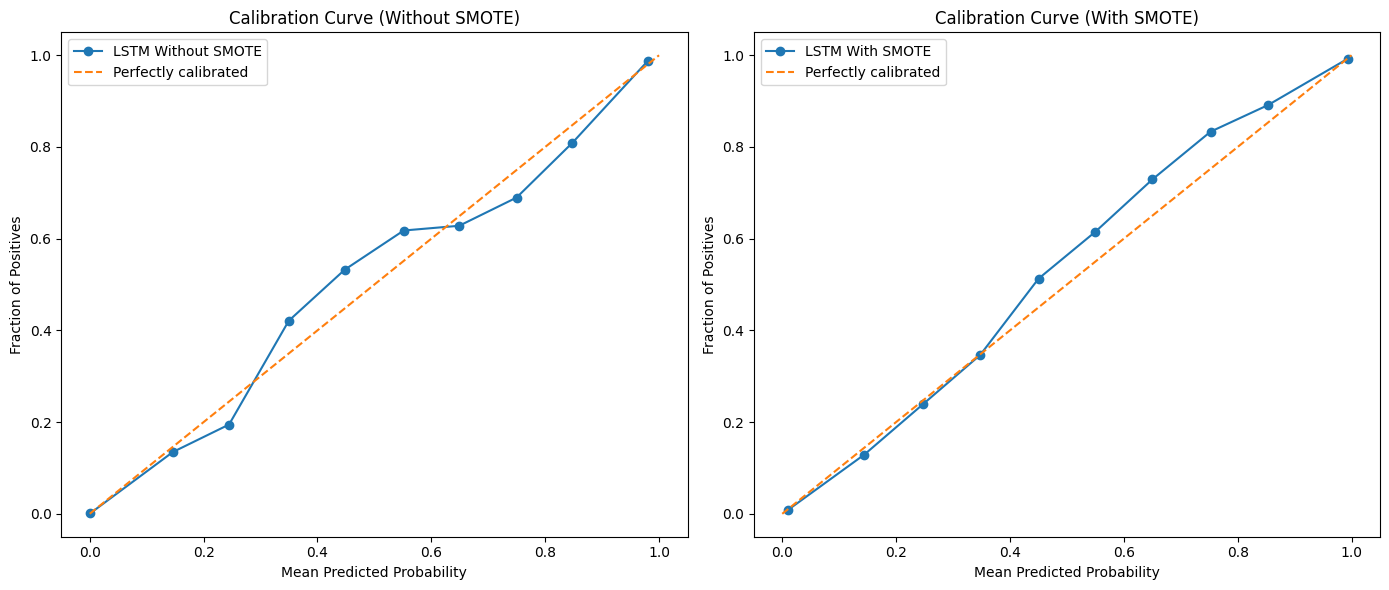

In [36]:
from sklearn.calibration import calibration_curve

# Calculate the calibration curves for the model without SMOTE
y_prob_lstm = model_lstm.predict(X_test_lstm).ravel()
fraction_of_positives_lstm, mean_predicted_value_lstm = calibration_curve(Y_test, y_prob_lstm, n_bins=10)

# Calculate the calibration curves for the model with SMOTE
y_prob_lstm_smote = model_lstm_smote.predict(X_test_lstm_smote).ravel()
fraction_of_positives_lstm_smote, mean_predicted_value_lstm_smote = calibration_curve(Y_test_smote, y_prob_lstm_smote, n_bins=10)

# Plot the calibration curves for both models
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for model without SMOTE
ax[0].plot(mean_predicted_value_lstm, fraction_of_positives_lstm, marker='o', label='LSTM Without SMOTE')
ax[0].plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
ax[0].set_title('Calibration Curve (Without SMOTE)')
ax[0].set_xlabel('Mean Predicted Probability')
ax[0].set_ylabel('Fraction of Positives')
ax[0].legend()

# Plot for model with SMOTE
ax[1].plot(mean_predicted_value_lstm_smote, fraction_of_positives_lstm_smote, marker='o', label='LSTM With SMOTE')
ax[1].plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
ax[1].set_title('Calibration Curve (With SMOTE)')
ax[1].set_xlabel('Mean Predicted Probability')
ax[1].set_ylabel('Fraction of Positives')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


### Analyse des courbes de calibration des modèles LSTM avec et sans SMOTE
tifs.

#### Analyse des résultats
- **Modèle LSTM sans SMOTE**:
  - **Écart par rapport à la diagonale**: La courbe s'écarte significativement, surtout dans la partie inférieure.
  - **Sous-estimation des probabilités**: Probabilités réelles souvent plus élevées que celles prédites.

- **Modèle LSTM avec SMOTE**:
  - **Amélioration de la calibration**: Courbe beaucoup plus proche de la diagonale.
  - **Moins de biais**: Meilleure estimation des probabiltection de fraude.

#### Conclusion
L'utilisation de SMOTE a considérablement amélioré la calibration du modèle LSTM, rendant les probabilités prédites plus fiables pour la prise de décisions.
